# <font color = blue>  Bike sharing Assignment </font>

#### Problem Statement: 
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.


#### Objective:
The company wants to know:
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

In [1]:
# Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',100)
sns.set_context("notebook")

## Step1: Data Reading and initial data inspection

Here,
- task 1.1: We read the 'day' dataset
- task 1.2: Perform quick inspection about the source dataframe
- task 1.3: Perform changes to make better exploratory data analysis

**Task 1.1: Reading the 'day' dataset**

In [2]:
bike = pd.read_csv("day.csv")

In [3]:
bike.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


**Task 1.2: Inspecting the dataframe**

In [4]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


**Observation:** The dataset have no null values

In [5]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
bike.shape

(730, 16)

**Observation:** Since the categorical variables(weathersit, season, weekday, mnth) have numeric vales, we fist convert them to strings before further analysis

**Task 1.3: Doing Changes to perform better EDA**

In [7]:
#Weeday num to string conversion, the string value for a number is considered based on the actual date. where 1-1-2018 is Sunday
bike["weekday"] = bike["weekday"].map({0:"Sun", 1: "Mon", 2: "Tue", 3: "Wed", 4: "Thu", 5: "Fri", 6: "Sat"})

In [8]:
#Month num to string conversion
bike["mnth"] = bike["mnth"].map({1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun",
                                 7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"})


In [9]:
#Season num to sting conversion
bike["season"] = bike["season"].map({1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"})

In [10]:
# converting Weathersit num to categorical

bike["weathersit"] = bike["weathersit"].map({1:"Clear", 2:"Mist", 3:"Light_rain", 4:"Heavy_rain"})

In [11]:
# Inspecting the changes

bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,0,Jan,0,Mon,1,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,Jan,0,Tue,1,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Step 2: Visualising the Data

Here,
- task 2.1: Visualize numerical varibles for checking the correlation and drop predictors showing multicollinearity
- task 2.2: Visualize the categorical variables

**Task 2.1: Visualizing the numerical variables**

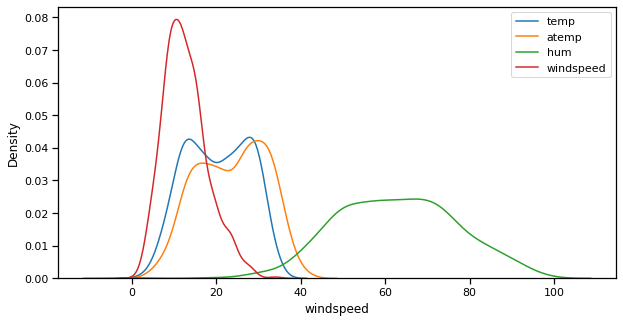

In [12]:
#Analysing the distribution of the numeric predictors

f, ax = plt.subplots(figsize =(10,5))
sns.distplot(bike["temp"],hist = False, label = "temp", ax = ax)
sns.distplot(bike["atemp"],hist = False, label = "atemp", ax = ax)
sns.distplot(bike["hum"],hist = False, label = "hum", ax = ax)
sns.distplot(bike["windspeed"],hist = False, label = "windspeed", ax = ax)
ax.legend()

plt.show()

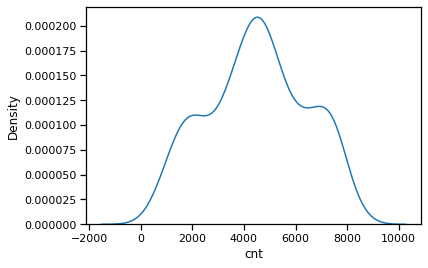

In [13]:
# Analysing the distribution of the target variable
sns.distplot(bike["cnt"],hist = False)
plt.show()

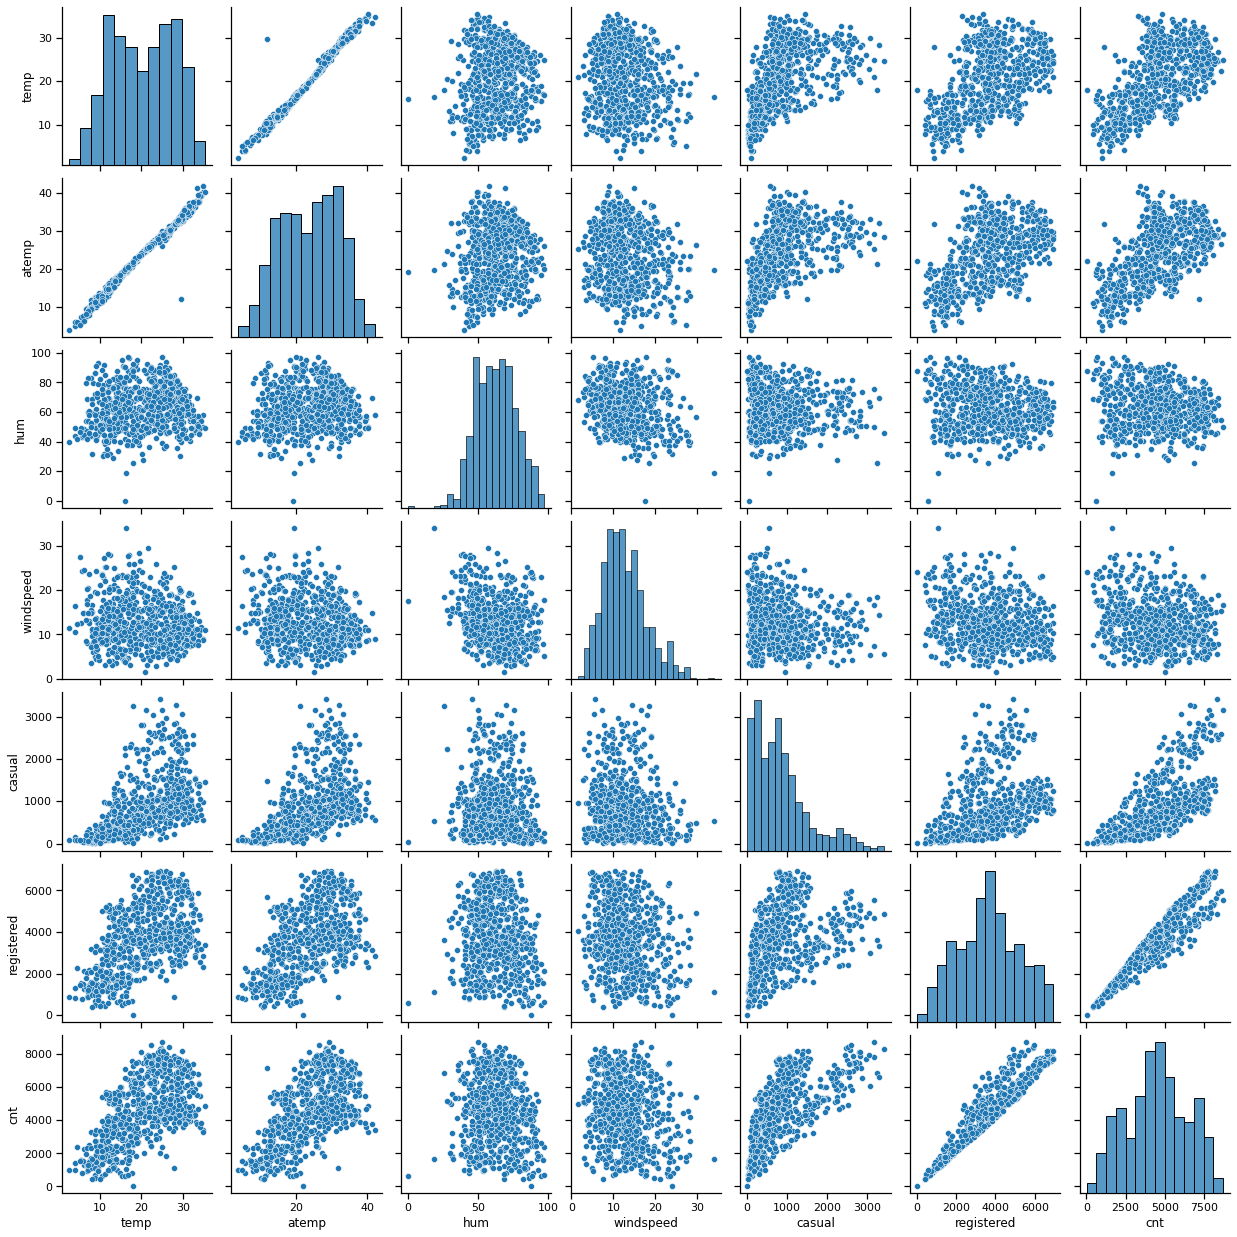

In [14]:
# Visualizing the numeric variables using pairplot to find the correlation patterns
sns.pairplot(bike[["temp","atemp","hum","windspeed",'casual','registered','cnt']])
plt.show()

**Observations:** From the scatterplots it is apparent that 'temp' and 'atemp' have a strong correlation. Hence one of the two variable can be dropped before building the model

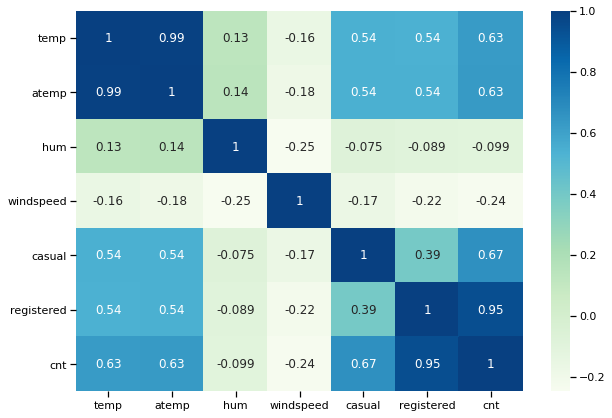

In [15]:
# Analysing the correaltion using heatmap plot
plt.figure(figsize=[10,7])
sns.heatmap(bike[["temp","atemp","hum","windspeed",'casual','registered','cnt']].corr(),annot = True,cmap="GnBu")
plt.show()

**Observation:** 
- 'temp' and 'atemp' have a good correlation with teh target variable of 0.63
- windspeed has very small correlation of -0.24 with the targert variable


**Task 2.2: Visualizing the categorical variables**

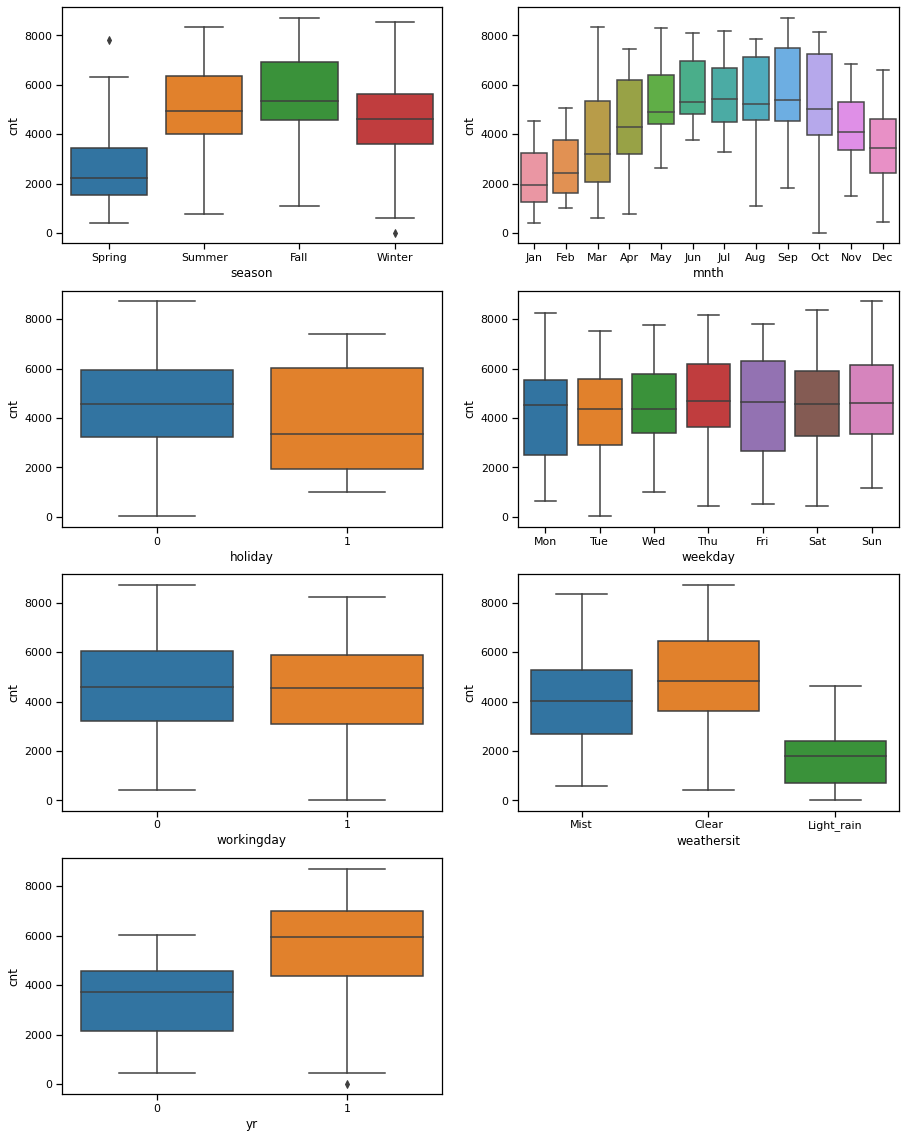

In [16]:
plt.figure(figsize=(15, 20))
plt.subplot(4,2,1)
sns.boxplot(x = "season", y = "cnt", data = bike)
plt.subplot(4,2,2)
sns.boxplot(x = "mnth", y = "cnt", data = bike)
plt.subplot(4,2,3)
sns.boxplot(x = "holiday", y = "cnt", data = bike)
plt.subplot(4,2,4)
sns.boxplot(x = "weekday", y = "cnt", data = bike)
plt.subplot(4,2,5)
sns.boxplot(x = "workingday", y = "cnt", data = bike)
plt.subplot(4,2,6)
sns.boxplot(x = "weathersit", y = "cnt", data = bike)
plt.subplot(4,2,7)
sns.boxplot(x = "yr", y = "cnt", data = bike)
plt.show()

#### Observation:
- Season: Summer and Fall observed highest number of bike rentals of all the seasons
- Month: The median of bike rentals in July and Sptember month was the highest and similarly in Jan the bike rentals were lowest
- Holiday: The median number of rentals during non-holidays is higher compared to holidays 
- Weekday: The bike rentals from Thursday to Sunday is slightly higher compared to other days of the week
- Workingday: The median of rentals on working day and non-working day is almost same
- Weathersit: The number of rentals during clear weather is high follwed by misty days. Similarly, the number if bike rentals is low during light rain and no records during heavy rain

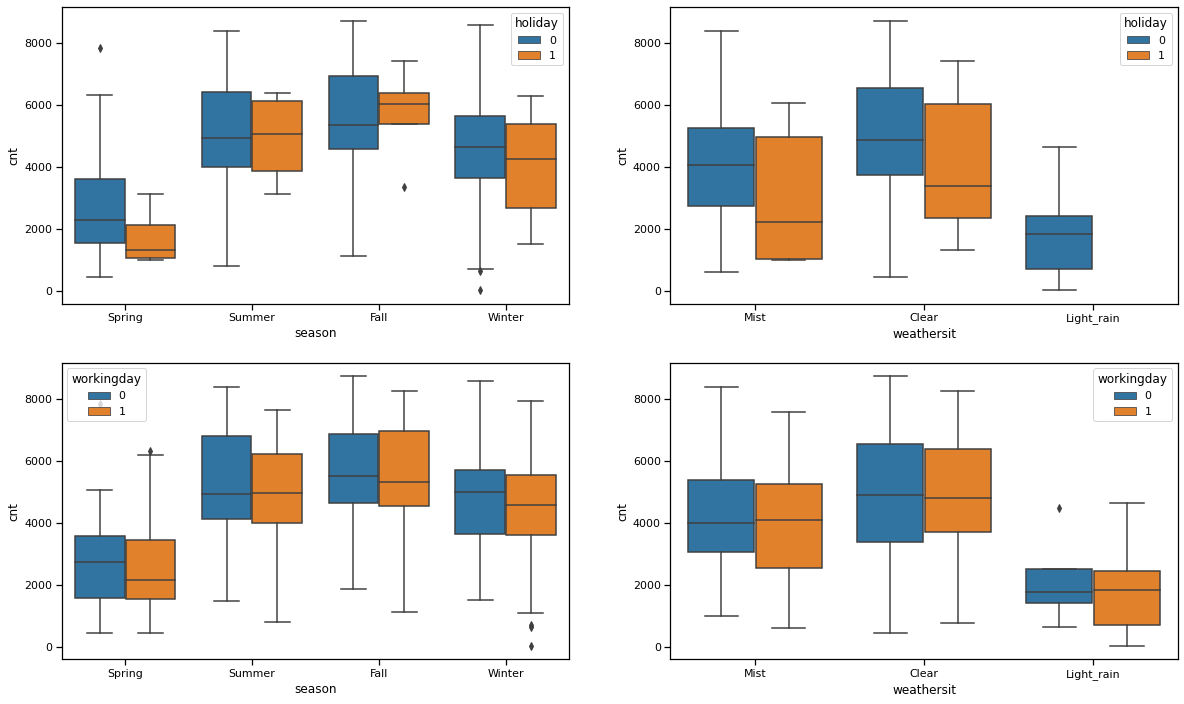

In [17]:
#Analysing boxplot with holiday and workigday
plt.figure(figsize=(20, 12))

# Analysing the boxplots with respect to holidays
plt.subplot(2,2,1)
sns.boxplot(x = "season", y = "cnt", hue = "holiday", data = bike)
plt.subplot(2,2,2)
sns.boxplot(x = "weathersit", y = "cnt", hue = "holiday", data = bike)

# Analysing the boxplots with respect to workingday
plt.subplot(2,2,3)
sns.boxplot(x = "season", y = "cnt", hue = "workingday", data = bike)
plt.subplot(2,2,4)
sns.boxplot(x = "weathersit", y = "cnt", hue = "workingday", data = bike)

plt.show()

#### Observation:
- Only in the fall and summer the bike rentals were more on holidays
- In working days, despite the weather condition the bike rentals almost have same pattern


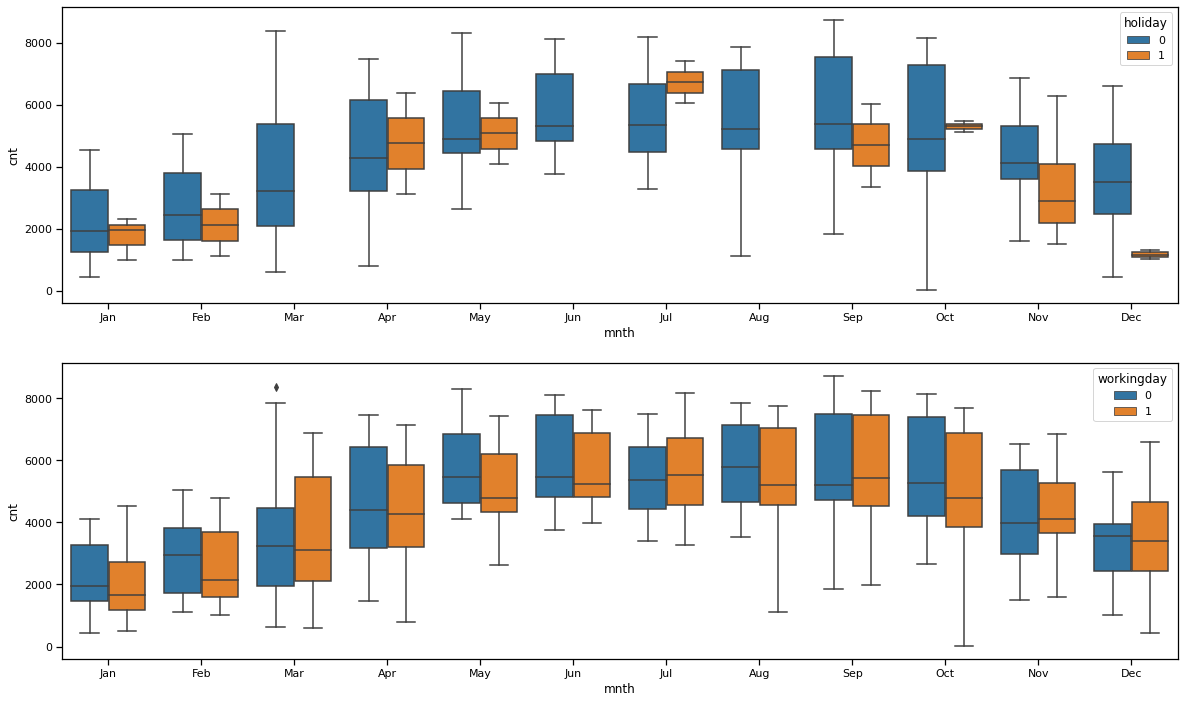

In [18]:
#Analysing boxplot with holiday and workigday for month
plt.figure(figsize=(20, 12))

# Analysing the boxplots with respect to holidays
plt.subplot(2,1,1)
sns.boxplot(x = "mnth", y = "cnt", hue = "holiday", data = bike)

# Analysing the boxplots with respect to workingday
plt.subplot(2,1,2)
sns.boxplot(x = "mnth", y = "cnt", hue = "workingday", data = bike)

plt.show()

#### Observation:
 - Holidays in the month of April, May and July recoreded highest number of bike rentals
 - The number of bike rentals during working days in the month of July, September and November is slightly lower compared to non-working days

## Step 3: Data Preperation

Here, we make data ready for model building by doing the required changes as per the observations in the data visualization
- task 3.1: We create dummy variables (if required)
- task 3.2: Splitting to train-test data 
- task 3.3: Scaling the numeric variables

**Task 3.1: Creating dummy variables**

All the categorical variables except 'holiday' and 'workingday' have multi level of categories. Hence dummy variables can be created for each of them.

In [19]:
season_dummy = pd.get_dummies(bike["season"],drop_first=True)
weekday_dummy = pd.get_dummies(bike["weekday"],drop_first=True)
mnth_dummy = pd.get_dummies(bike["mnth"],drop_first=True)
weather_dummy = pd.get_dummies(bike["weathersit"],drop_first=True)

In [20]:
#Merging the dummy variables to our main dataframe

bike = pd.concat([bike,season_dummy,weekday_dummy,mnth_dummy,weather_dummy],axis =1)

- Now, We can drop the columns 'season', 'weathersit', 'weekday', 'mnth' as the dummy variables are created for each category
- We can also drop 'atemp' as it has positively strong correlation with vairble 'temp' causing multicollinearity
- We also drop 'casual' and 'registered' as cnt is total of them, and these variables will not be available druing real time predictions
- The variable 'dteday' doesn't required as there are two other columns mnth and yr providing the same information. Hence it can be dropped as well
- Moreover, the variable 'instant' representing the index of the column which doesnot contribute to the analysis thus it can be dropped,

In [21]:
# Dropping of unwanted columns for better model building
bike.drop(['season', 'weathersit', 'weekday', 'mnth','registered','casual','dteday','instant','atemp'],axis = 1, inplace = True)

In [22]:
# Inspecting if the above changes are done correctly
bike.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,Mon,Sat,Sun,Thu,Tue,Wed,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Light_rain,Mist
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


**Task 3.2: Splitting to train-test data**

In [23]:
# Importing package for train-test split
from sklearn.model_selection import train_test_split

In [24]:
#Splitting to train and test data
bike_train, bike_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

**Task 3.3: Standard scaling of numeric variables**

In [25]:
# Importing the package for Standard scaling()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [26]:
# Applying the Standard scaling for the required numeric columns
num_cols = ["temp","hum","windspeed","cnt"]

bike_train[num_cols] = scaler.fit_transform(bike_train[num_cols])
bike_test[num_cols] = scaler.transform(bike_test[num_cols])

In [27]:
# Analysing the training dataset
bike_train.head(3)

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,Mon,Sat,Sun,Thu,Tue,Wed,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Light_rain,Mist
653,1,0,1,-0.121335,-0.514725,-0.117752,1.562685,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
576,1,0,1,1.231731,0.516433,-0.330615,1.399629,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
426,1,0,0,-0.420478,-0.069854,-0.385694,-0.215554,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [28]:
bike_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,Mon,Sat,Sun,Thu,Tue,Wed,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Light_rain,Mist
count,510.000000,510.000000,510.000000,5.100000e+02,5.100000e+02,5.100000e+02,5.100000e+02,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,-2.687393e-16,-3.459107e-16,-2.351061e-16,-5.398732e-17,0.243137,0.245098,0.24902,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.029412,0.343137
std,0.500429,0.157763,0.453386,1.000982e+00,1.000982e+00,1.000982e+00,1.000982e+00,0.429398,0.430568,0.43287,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.169124,0.475223
min,0.000000,0.000000,0.000000,-2.381246e+00,-4.462565e+00,-1.890981e+00,-2.289141e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,-8.749555e-01,-7.666192e-01,-7.167878e-01,-7.006213e-01,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,1.443562e-02,2.294988e-02,-1.415145e-01,2.236523e-02,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,8.773604e-01,7.167702e-01,5.522525e-01,7.625291e-01,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,2.050938e+00,2.399023e+00,4.004188e+00,2.167738e+00,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
bike_train.shape

(510, 29)

In [30]:
# Analyinsg the test dataset
bike_test.head(3)

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,Mon,Sat,Sun,Thu,Tue,Wed,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Light_rain,Mist
184,0,1,0,1.305371,0.047995,-1.394498,0.798166,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
535,1,0,1,1.613721,-0.276087,-0.984730,0.884309,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
299,0,0,0,-0.112129,1.285378,0.079219,-0.937002,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [31]:
bike_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          219 non-null    int64  
 1   holiday     219 non-null    int64  
 2   workingday  219 non-null    int64  
 3   temp        219 non-null    float64
 4   hum         219 non-null    float64
 5   windspeed   219 non-null    float64
 6   cnt         219 non-null    float64
 7   Spring      219 non-null    uint8  
 8   Summer      219 non-null    uint8  
 9   Winter      219 non-null    uint8  
 10  Mon         219 non-null    uint8  
 11  Sat         219 non-null    uint8  
 12  Sun         219 non-null    uint8  
 13  Thu         219 non-null    uint8  
 14  Tue         219 non-null    uint8  
 15  Wed         219 non-null    uint8  
 16  Aug         219 non-null    uint8  
 17  Dec         219 non-null    uint8  
 18  Feb         219 non-null    uint8  
 19  Jan         219 non-null    

In [32]:
bike_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,Mon,Sat,Sun,Thu,Tue,Wed,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Light_rain,Mist
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.096083,-0.081388,-0.043731,0.031073,0.255708,0.264840,0.232877,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758,0.027397,0.319635
std,0.500722,0.188034,0.481313,1.035793,1.022197,0.942916,0.973536,0.437258,0.442259,0.423633,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125,0.163612,0.467403
min,0.000000,0.000000,0.000000,-2.174744,-2.665411,-2.143341,-2.074296,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,-0.809372,-0.844689,-0.720691,-0.606530,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.094973,-0.155290,-0.125622,0.047490,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.983209,0.641963,0.485055,0.709202,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.981904,2.413751,2.869216,2.004169,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
bike_test.shape

(219, 29)

## Step 5: Building the model

Here,
- first we filterout the variables using RFE method and build an initial model with it
- Then, we fine-tune the model by dropping out the insignificant and multicollinear predictors by analysing the statistics report of the model

In [34]:
# Spltting the data to x and y variables
y_train = bike_train.pop('cnt')
X_train = bike_train

##### RFE (Recursive Feature Elimination) method
This method is used to take the best 15 variables

In [35]:
# Importing packages for RFE and linear regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [36]:
# The initial model be proceeded with 20 variables
lm = LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(lm,20)
rfe = rfe.fit(X_train,y_train)

In [37]:
# cheking the rank of each feature by RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('Mon', False, 3),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', False, 7),
 ('Tue', False, 2),
 ('Wed', False, 5),
 ('Aug', False, 4),
 ('Dec', True, 1),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 8),
 ('Mar', False, 9),
 ('May', True, 1),
 ('Nov', True, 1),
 ('Oct', False, 6),
 ('Sep', True, 1),
 ('Light_rain', True, 1),
 ('Mist', True, 1)]

In [38]:
# checking the list of feature that are considered
considered_cols = X_train.columns[rfe.support_]
considered_cols

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Spring',
       'Summer', 'Winter', 'Sat', 'Sun', 'Dec', 'Feb', 'Jan', 'Jul', 'May',
       'Nov', 'Sep', 'Light_rain', 'Mist'],
      dtype='object')

In [39]:
# Checking the list of features that are ignored
X_train.columns[~rfe.support_]

Index(['Mon', 'Thu', 'Tue', 'Wed', 'Aug', 'Jun', 'Mar', 'Oct'], dtype='object')

In [40]:
# Importing the statsmodels package for building the linear regression model
import statsmodels.api as sm

# Importing the package for checking the VIF factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [41]:
X_train_rfe = X_train[considered_cols]

In [42]:
# User defined function to generate the vif values for the model
def vif_result(current_df):
    vif = pd.DataFrame()
    vif['features'] = current_df.columns
    vif['VIF'] = [ variance_inflation_factor(current_df.values,i) for i in range(current_df.shape[1]) ]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by= 'VIF', ascending = False )
    return vif

#### Running first model lm_1

In [43]:
# adding the constant
X_train_lm_1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()

In [44]:
#cheking the statistics analysis
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     136.9
Date:                Sun, 01 Aug 2021   Prob (F-statistic):          9.48e-186
Time:                        21:44:21   Log-Likelihood:                -242.41
No. Observations:                 510   AIC:                             526.8
Df Residuals:                     489   BIC:                             615.7
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1824      0.323     -0.564      0.5

In [45]:
#checking the VIF values of the predictors
vif_result(X_train_rfe)

,features,VIF
2,workingday,10.59
6,Spring,7.42
8,Winter,5.04
3,temp,4.77
7,Summer,4.47
10,Sun,2.87
9,Sat,2.77
13,Jan,2.59
19,Mist,2.41
0,yr,2.10


**Observation:** The feature workingday has very high VIF (10.59) and high p-value > 0.05. Any predictor that has VIF > 10 can be considered having high multicollinearity. Hence this variable can be dropped. Similarly any variable having high p-value > 0.05 can be considered insignificant and can be dropped as well

#### Running second model lm_2

In [46]:
X_train_rfe.drop(['workingday'],axis = 1,inplace = True)

In [47]:
#adding the constant
X_train_lm_2 = sm.add_constant(X_train_rfe) 

# Create second fitted model
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()

In [48]:
# checking the statistics analysis
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     144.2
Date:                Sun, 01 Aug 2021   Prob (F-statistic):          1.07e-186
Time:                        21:44:22   Log-Likelihood:                -242.75
No. Observations:                 510   AIC:                             525.5
Df Residuals:                     490   BIC:                             610.2
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4369      0.070     -6.271      0.0

In [49]:
vif_result(X_train_rfe)

,features,VIF
5,Spring,3.96
2,temp,3.04
7,Winter,2.67
12,Jan,2.45
18,Mist,2.20
6,Summer,2.07
0,yr,2.04
11,Feb,1.95
15,Nov,1.87
3,hum,1.86


**Observation:** The variable 'Thu' has p-value(0.975) stating that it is an insignificant variable. Any predictor having p-value greater than 0.05 can be considered insignificant. Thus, it can be dropped.

#### Running third model lm_3

In [50]:
X_train_rfe.drop('Summer',axis = 1,inplace = True)

In [51]:
X_train_lm_3 = sm.add_constant(X_train_rfe)

# Create third fitted model
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()

In [52]:
# checking the statistics analysis
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     151.6
Date:                Sun, 01 Aug 2021   Prob (F-statistic):          3.03e-187
Time:                        21:44:22   Log-Likelihood:                -244.07
No. Observations:                 510   AIC:                             526.1
Df Residuals:                     491   BIC:                             606.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3545      0.047     -7.580      0.0

In [53]:
vif_result(X_train_rfe)

,features,VIF
5,Spring,3.79
2,temp,3.02
6,Winter,2.60
11,Jan,2.45
17,Mist,2.02
10,Feb,1.94
14,Nov,1.87
0,yr,1.85
3,hum,1.78
9,Dec,1.67


**Observation:** The variable 'Sat' is having high p-value(0.204). Hence, it can be dropped as well

#### Running fourth model lm_4

In [54]:
X_train_rfe.drop('Sat',axis = 1,inplace = True)

In [55]:
X_train_lm_4 = sm.add_constant(X_train_rfe)

# Create fourth fitted model
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()

In [56]:
# checking the statistics analysis
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     160.2
Date:                Sun, 01 Aug 2021   Prob (F-statistic):          5.26e-188
Time:                        21:44:23   Log-Likelihood:                -244.91
No. Observations:                 510   AIC:                             525.8
Df Residuals:                     492   BIC:                             602.0
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3462      0.046     -7.471      0.0

In [57]:
vif_result(X_train_rfe)

,features,VIF
5,Spring,3.75
2,temp,2.98
6,Winter,2.59
10,Jan,2.45
16,Mist,1.98
9,Feb,1.94
13,Nov,1.87
0,yr,1.84
3,hum,1.76
8,Dec,1.67


**Observation:** The predictors 'Sun' has high p-value(0.106). Hence it can be dropped as well

#### Running fifth model lm_5

In [58]:
X_train_rfe.drop('Sun',axis = 1,inplace = True)

In [59]:
X_train_lm_5 = sm.add_constant(X_train_rfe)

# Create fifth fitted model
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()

In [60]:
# checking the statistics analysis
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     169.5
Date:                Sun, 01 Aug 2021   Prob (F-statistic):          1.45e-188
Time:                        21:44:23   Log-Likelihood:                -246.26
No. Observations:                 510   AIC:                             526.5
Df Residuals:                     493   BIC:                             598.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3377      0.046     -7.323      0.0

In [61]:
vif_result(X_train_rfe)

,features,VIF
5,Spring,3.73
2,temp,2.97
6,Winter,2.58
9,Jan,2.45
8,Feb,1.94
15,Mist,1.93
12,Nov,1.87
0,yr,1.84
3,hum,1.75
7,Dec,1.67


**Observation:** The variable 'Feb' also have a significant p-value. Hence it can be dropped

#### Running sixth model lm_6

In [62]:
X_train_rfe.drop('Feb',axis = 1,inplace = True)

In [63]:
X_train_lm_6 = sm.add_constant(X_train_rfe)

# Create sixth fitted model
lr_6 = sm.OLS(y_train,X_train_lm_6).fit()

In [64]:
# checking the statistics analysis
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.5
Date:                Sun, 01 Aug 2021   Prob (F-statistic):          7.27e-189
Time:                        21:44:24   Log-Likelihood:                -248.25
No. Observations:                 510   AIC:                             528.5
Df Residuals:                     494   BIC:                             596.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3459      0.046     -7.511      0.0

In [65]:
vif_result(X_train_rfe)

,features,VIF
2,temp,2.85
5,Spring,2.60
6,Winter,2.56
14,Mist,1.93
11,Nov,1.84
0,yr,1.83
8,Jan,1.78
3,hum,1.75
7,Dec,1.54
9,Jul,1.43


**Observation:** 
- Now all predictors have their p-value and VIF in the acceptance region. 
- The R-square and Adjusted R-squared have close values within range of 5 percentage.
- The probbility of F-statistics also less than 0.05

Hence, this model can be considered as significant model

## Step 6: Residual analysis of the Train data

Here, We check if the error terms are normally distributed

In [66]:
y_train_pred = lr_6.predict(X_train_lm_6)

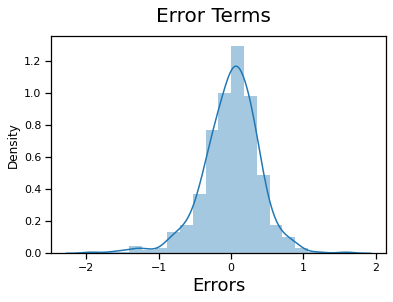

In [67]:
# histogram plot of the error terms to check the distribution

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

plt.show()

**Observation:** The error terms are normally distributed

## Step 7: Making Predictions using the final model

Here,
 we make predictions on the test data set

In [68]:
# Splitting the test set to x and y
y_test = bike_test.pop('cnt')
X_test = bike_test[X_train_rfe.columns]

In [69]:
# Predicting the y values from X_test

X_test_lm6 = sm.add_constant(X_test)
y_test_pred = lr_6.predict(X_test_lm6)

## Model Evaluation

Here 
- we check if the y_test and y_pred obtain a linear relationship
- compare the R square value of the final model on test data


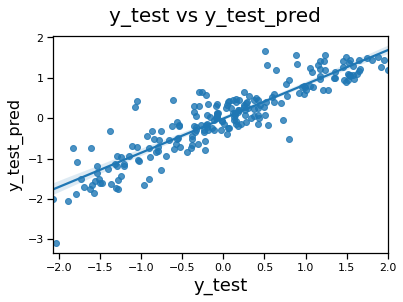

In [70]:
fig = plt.figure()
sns.regplot(x= y_test, y= y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)     
plt.show()

**Observation:** The actual and predicted y test values follow a linear relation indicating reliablity of the predictions

**Checking the R-squared value**

In [71]:
# impoting the library for checking the r2 value
from sklearn.metrics import r2_score

In [72]:
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.8258569417741984

**Observation:** Since the difference in R-squared value of the final model(lr_6) on the training and test data set is less than 5%, it is conclusive that the model predictions are accurate and reliable

**Result Summary:** It is apparent that the y_test and the predicted y values follow a linear pattern and are uniformly distributed across the bestfit line

The equation of our best fit line is:


$ cnt = 1.0328  \times  yr - 0.3995  \times  holiday + 0.4410 \times temp - 0.1059 \times hum - 0.1367 \times windspeed - 0.4123 \times Spring + 0.3653 \times Winter - 0.1956 \times Dec - 0.2206 \times Jan - 0.2893 \times Jul + 0.1650 \times May - 0.2163 \times Nov + 0.2848 \times Sep - 1.1079 \times Light\_rain -0.2523 \times Mist - 0.3459 $

The predictors with positive coefficients contributes to increase in the bike rentals. Simlarly, for predictors with negative coefficients, increase in x value decreases the number of bike rentals


Thus the company can consider the following points to improve their business
- The temperature is one of the significant predictor, with increase in 1 unit of temp, the bike rentals increases by 0.4410 
- Winter seasons have a postivie contribution to increase in bike rentals
- Of all months, the number of rentals in the month of september is reasonably high
- The number of retals decrease by 0.1367 with increase in 1 unit of windspeed, and similarly, the number or rentals decrease by 0.1367 with increase in one unit of humidity
- In terms of weather, the bike rentals decreases during light rain/snow or mist days 
- The positive coefficient for predictor 'yr' determines that the popularity and demand for bike rentals increases with increasing years.
- The number of rentals decreases by 0.3995 per holiday